<a href="https://colab.research.google.com/github/millermuttu/Notebooks/blob/master/cattle_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from fastai.vision import *
from pathlib import Path


In [10]:
folder = 'brahman'
file = 'brahman.csv'

In [11]:
folder = 'hereford'
file = 'hereford.csv'


In [12]:
folder = 'holstein'
file = 'holstein.csv'


In [13]:
path = Path('./drive/My Drive/cattle models')


In [33]:
from pathlib import Path
import requests

# Destination folder
dest = Path("holstein_images")
dest.mkdir(parents=True, exist_ok=True)

# Define URLs
urls = [
    "https://www.researchgate.net/profile/Luc-Dossa/publication/359681238/figure/fig1/AS:1144309525020675@1649836059114/Pictures-of-cattle-breeds-in-the-study-area.png"
]

# Function to download
def download_images(urls, dest):
    for url in urls:
        filename = dest / url.split("/")[-1]  # extract file name from url
        response = requests.get(url)
        with open(filename, "wb") as f:
            f.write(response.content)
        print(f"Downloaded {filename}")

# Call function
download_images(urls, dest=dest)



Downloaded holstein_images\Pictures-of-cattle-breeds-in-the-study-area.png


In [34]:
path

Path('data/cattle')

In [35]:
classes = ['hereford','holstein','brahman']

In [38]:
from fastai.vision.all import download_images
from pathlib import Path

dest = Path("holstein_images")
dest.mkdir(parents=True, exist_ok=True)

# Download using txt file
download_images(dest, url_file=Path("holstein_urls.txt"), max_pics=100)


In [97]:
from fastai.vision.all import *
from pathlib import Path

# Set seed for reproducibility
np.random.seed(42)

# Path to your dataset
path = Path(r"C:\Users\SUNNY SANGWAN\ML\C-B-R\cattle")

# 1️⃣ Verify and remove corrupted images
for c in path.ls():
    failed = verify_images(c)
    failed.map(Path.unlink)
    print(f"Removed {len(failed)} bad images from {c.name}")

# 2️⃣ Create DataLoaders
dls = ImageDataLoaders.from_folder(
    path,
    train=".",            # subfolders = class names
    valid_pct=0.2,        # 20% validation
    seed=42,
    item_tfms=Resize(224),
    batch_tfms=Normalize.from_stats(*imagenet_stats)
)

# 3️⃣ Print class names
# Print classes and dataset sizes
print("Classes:", dls.vocab)
print("Number of classes:", len(dls.vocab))
print("Training samples:", len(dls.train_ds))
print("Validation samples:", len(dls.valid_ds))






'WindowsPath' object is not iterable
Removed 0 bad images from cattle.PNG
'WindowsPath' object is not iterable
Removed 0 bad images from holstein
'WindowsPath' object is not iterable
Removed 0 bad images from jersey
'WindowsPath' object is not iterable
Removed 0 bad images from models
Classes: ['cattle', 'holstein', 'jersey']
Number of classes: 3
Training samples: 4
Validation samples: 1


In [98]:
len(dls.train_ds), len(dls.valid_ds)


(4, 1)

In [99]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)



In [100]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,nan,0.360900,1.000000,00:00
1,nan,0.360900,1.000000,00:00
2,nan,0.360900,1.000000,00:00
3,nan,0.360900,1.000000,00:00


In [101]:
learn.save('stage-1')

Path('C:/Users/SUNNY SANGWAN/ML/C-B-R/cattle/models/stage-1.pth')

In [102]:
learn.unfreeze()

In [104]:
learn.fine_tune(3)


epoch,train_loss,valid_loss,accuracy,time
0,nan,0.360900,1.000000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,nan,0.360900,1.000000,00:00
1,nan,0.360900,1.000000,00:00
2,nan,0.360900,1.000000,00:00


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

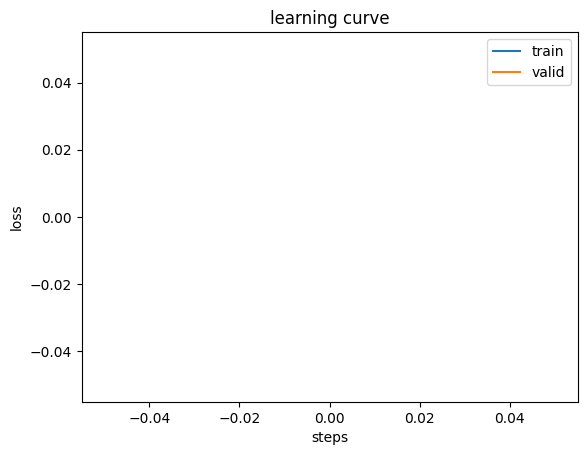

In [106]:
learn.recorder.plot_loss()


In [108]:
path = Path(r"C:\Users\SUNNY SANGWAN\ML\C-B-R\cattle")


In [110]:
learn.fit_one_cycle(10, lr_max=1e-3)


epoch,train_loss,valid_loss,accuracy,time
0,nan,0.360900,1.000000,00:00
1,nan,0.360900,1.000000,00:00
2,nan,0.360900,1.000000,00:00
3,nan,0.360900,1.000000,00:00
4,nan,0.360900,1.000000,00:00
5,nan,0.360900,1.000000,00:00
6,nan,0.360900,1.000000,00:00
7,nan,0.360900,1.000000,00:00
8,nan,0.360900,1.000000,00:00
9,nan,0.360900,1.000000,00:00


In [111]:
learn.save('stage2')

Path('C:/Users/SUNNY SANGWAN/ML/C-B-R/cattle/models/stage2.pth')

In [112]:
learn.load('stage2');


In [113]:
interp = ClassificationInterpretation.from_learner(learn)

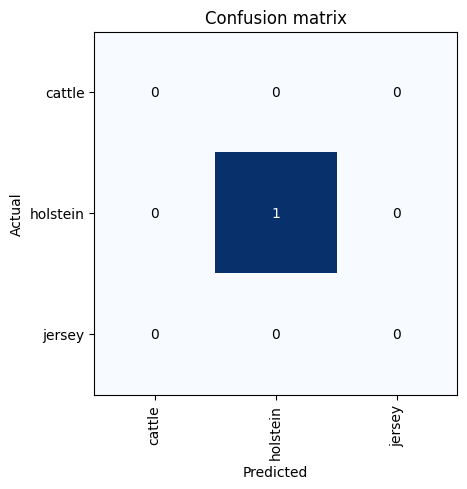

In [114]:
interp.plot_confusion_matrix()

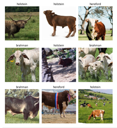

In [118]:
from fastai.vision.all import *
from fastai.vision.widgets import *

# Suppose you have a learner already trained
cleaner = ImageClassifierCleaner(learn)
cleaner


In [117]:
pip install ipywidgets


   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 3.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 4.2 MB/s eta 0:00:01
   -------------------------------------- - 2.1/2.2 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 3.3 MB/s  0:00:00

   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   ---------------------------------------- 3/3 [ipywidgets]

Note: you may need to restart the kernel to use updated packages.


In [130]:
from fastai.vision.all import *

# DataBlock
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)

# Create DataLoaders
dls = db.dataloaders(path, bs=64)
files = get_image_files(path)
print("Total images found:", len(files))
print(files[:10])

# Verify classes
print("Classes:", dls.vocab)
print("Number of classes:", dls.c)

# ✅ Create Learner
learn_cln = vision_learner(dls, resnet34, metrics=accuracy)

# Check model




Total images found: 5
[Path('C:/Users/SUNNY SANGWAN/ML/C-B-R/cattle/cattle.PNG'), Path('C:/Users/SUNNY SANGWAN/ML/C-B-R/cattle/holstein/img1.jpg'), Path('C:/Users/SUNNY SANGWAN/ML/C-B-R/cattle/holstein/img2.jpg'), Path('C:/Users/SUNNY SANGWAN/ML/C-B-R/cattle/jersey/img1.jpg'), Path('C:/Users/SUNNY SANGWAN/ML/C-B-R/cattle/jersey/img2.jpg')]
Classes: ['cattle', 'holstein', 'jersey']
Number of classes: 3


In [132]:
import os

print(os.listdir(learn.path / learn.model_dir))


['stage-1.pth', 'stage2.pth']


In [133]:
learn.save('stage2')


Path('C:/Users/SUNNY SANGWAN/ML/C-B-R/cattle/models/stage2.pth')

In [136]:
learn.load('stage2');

In [139]:
len(learn_cln.dls.valid_ds)


1

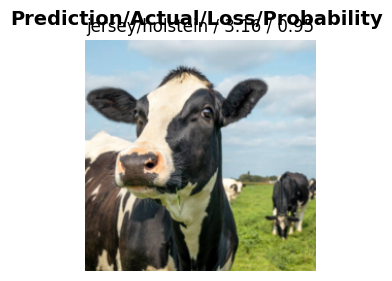

In [142]:
from fastai.vision.all import *

interp = ClassificationInterpretation.from_learner(learn_cln)
interp.plot_top_losses(1)
 # use a smaller number first

losses, idxs = interp.top_losses()


## Putting your model in production

In [143]:
learn.export()

In [144]:
defaults.device = torch.device('cpu')

In [147]:
from pathlib import Path
print(Path("data/cattle/export.pkl").exists())


True


<Axes: >

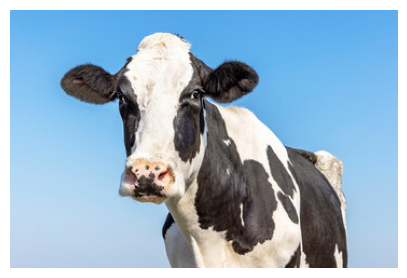

In [151]:
from fastai.vision.all import *

img = PILImage.create("C:\\Users\\SUNNY SANGWAN\\ML\\C-B-R\\cattle\\holstein\\img1.jpg")
img.show(figsize=(5,5))


In [152]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

'holstein'

In [155]:
from fastapi import FastAPI, Request
from fastapi.responses import JSONResponse
from fastai.vision.all import *
from io import BytesIO
import aiohttp

# Create FastAPI app
app = FastAPI()

# Helper to fetch bytes from a URL
async def get_bytes(url):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as resp:
            return await resp.read()

# Load your exported learner
learn = load_learner("C:\\Users\\SUNNY SANGWAN\\ML\\C-B-R\\data\\cattle\\export.pkl")  # make sure export.pkl exists

@app.get("/classify-url")
async def classify_url(request: Request):
    url = request.query_params["url"]
    bytes_data = await get_bytes(url)
    
    # FastAI v2 image creation
    img = PILImage.create(BytesIO(bytes_data))
    
    pred, pred_idx, probs = learn.predict(img)

    return JSONResponse({
        "predictions": sorted(
            zip(learn.dls.vocab, map(float, probs)),
            key=lambda p: p[1],
            reverse=True
        )
    })


# (This example is for the Starlette web app toolkit.)

In [157]:
path = Path("C:\\Users\\SUNNY SANGWAN\\ML\\C-B-R\\data\\cattle")

dls = ImageDataLoaders.from_folder(
    path,
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224),
    bs=64
)

learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

# Export trained model
learn.export("export.pkl")


TypeError: 'NoneType' object is not iterable